In [1]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import json
from Bio import SeqIO
import matplotlib.gridspec

In [2]:
exp = pd.read_csv('/Users/clairedubin/cocci/Silveira_ref/CpSilv_gb_annotations_and_expression_data.csv').set_index('Unnamed: 0')

In [3]:
gff_path = '../ref/genbank_files/CpSilv.genes_only.gff3'
gff = pd.read_csv(gff_path, sep='\t', header=None)[[0,2,3,4,6,8]]
gff.columns = ['chrom', 'type', 'start', 'stop', 'direction', 'annotation']
gff['gene'] = gff['annotation'].str.split(';',expand=True)[0].str.replace('ID=gene-','')

gff.head()

,chrom,type,start,stop,direction,annotation,gene
0,CP075068.1,gene,57375,57980,-,ID=gene-D8B26_000001;Name=D8B26_000001;gbkey=G...,D8B26_000001
1,CP075068.1,gene,58131,58768,-,ID=gene-D8B26_000002;Name=D8B26_000002;gbkey=G...,D8B26_000002
2,CP075068.1,gene,58628,59933,-,ID=gene-D8B26_000003;Name=D8B26_000003;gbkey=G...,D8B26_000003
3,CP075068.1,gene,60054,62173,-,ID=gene-D8B26_000004;Name=D8B26_000004;gbkey=G...,D8B26_000004
4,CP075068.1,gene,126638,126720,+,ID=gene-D8B26_000005;Name=D8B26_000005;gbkey=G...,D8B26_000005


In [4]:
!pwd

/Users/clairedubin/cocci/popgen/popgen_paper_github/chr3_region


In [5]:
df = pd.read_csv('../tables/TableS3B_VST.csv')
df.head()

,Chromosome,Start,VST_AZ_TXMXSA_CB,gene,Tucson_9,Phoenix_7,Tucson_21,Phoenix_2,Tucson_19,Phoenix_9,...,4545-MICE_Venezuela,3796_Venezuela,Nuevo_Leon_1,730334_Guatemala,Nuevo_Leon_2,San_Antonio_1,GT002_Texas,Coahuila_2,Sonora_1,B5773_Brazil
0,CP075068.1,1,0.103125,NaN,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1
1,CP075068.1,251,0.103125,NaN,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1
2,CP075068.1,501,0.103125,NaN,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1
3,CP075068.1,751,0.103125,NaN,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1
4,CP075068.1,1001,0.103125,NaN,1,1,1,1,1,1,...,1,1,1,1,1,2,1,1,1,1


In [6]:
#add pop info
pop_dict = json.load(open('../isolate_and_pop_info/pop_dict.json'))
for strain, pops in pop_dict.items():
    pop_dict[strain] = pops
    
drop_strains = [s for s in df.columns[4:] if s not in pop_dict]
df = df.drop(drop_strains, axis=1)

sorted_strain_cols = sorted(pop_dict, key=pop_dict.get)

In [7]:
df = df[df.columns[:4].tolist() + sorted_strain_cols]
df['VST_AZ_TXMXSA_CB'] = df['VST_AZ_TXMXSA_CB'].fillna(0)

In [8]:
repeatmasker_path = '../ref/RepeatMasker/CpSilv_core_only.fasta.out.gff'
repeatmasker = pd.read_csv(repeatmasker_path, sep='\t', header=None, comment='#')[[0,2,3,4,6,8]]
repeatmasker.columns = ['chrom', 'type', 'start', 'stop', 'direction', 'annotation']

nuc_repeats = repeatmasker[(repeatmasker['annotation'].str.contains(r'\([A-Z]+\)')) | (repeatmasker['annotation'].str.contains('-rich'))]
transposons = repeatmasker[~repeatmasker.index.isin(nuc_repeats.index)]

transposons

,chrom,type,start,stop,direction,annotation
1,CP075068.1,similarity,116,292,-,"Target ""Motif:DTX-incomp-chim_Blc56_Cpos_C735-..."
2,CP075068.1,similarity,157,1136,+,"Target ""Motif:RXX-TRIM_Blc207_Cpos_C735-L-B65-..."
3,CP075068.1,similarity,993,1672,-,"Target ""Motif:DTX-incomp-chim_Blc56_Cpos_C735-..."
5,CP075068.1,similarity,1708,9391,-,"Target ""Motif:DTX-incomp-chim_Blc56_Cpos_C735-..."
6,CP075068.1,similarity,8471,16405,-,"Target ""Motif:DTX-incomp-chim_Blc41_Cpos_C735-..."
...,...,...,...,...,...,...
11265,CP075072.1,similarity,1463409,1464429,-,"Target ""Motif:DTX-incomp-chim_Blc73_Superconti..."
11266,CP075072.1,similarity,1463830,1471523,-,"Target ""Motif:DTX-incomp_Blc54_Supercontig_3.5..."
11267,CP075072.1,similarity,1470023,1472092,+,"Target ""Motif:RXX-LARD_Blc184_Cpos_C735-L-B59-..."
11268,CP075072.1,similarity,1472093,1481680,+,"Target ""Motif:DTX-incomp-chim_Blc41_Cpos_C735-..."


In [9]:
chr_lens = {'CP075068.1':8340845,
            'CP075069.1':8079863,
            'CP075070.1':6494557,
            'CP075071.1':3437093,
            'CP075072.1':1489275}

chr_lens_norm = {}
total_length = sum(chr_lens.values())

for chrom, length in chr_lens.items():
    chr_lens_norm[chrom] = length/total_length

In [10]:
#get exact boundaries
xmin = 1200000
xmax = 1450000
chr3_cnv_region = df[(df['Chromosome']=='CP075070.1') & 
   (df['Start'].isin(range(xmin,xmax))) & 
   (df[sorted_strain_cols].apply(set, axis=1) != set([1]))]

start, stop = chr3_cnv_region['Start'].min(), chr3_cnv_region['Start'].max()+250
start, stop

(1237751, 1428001)

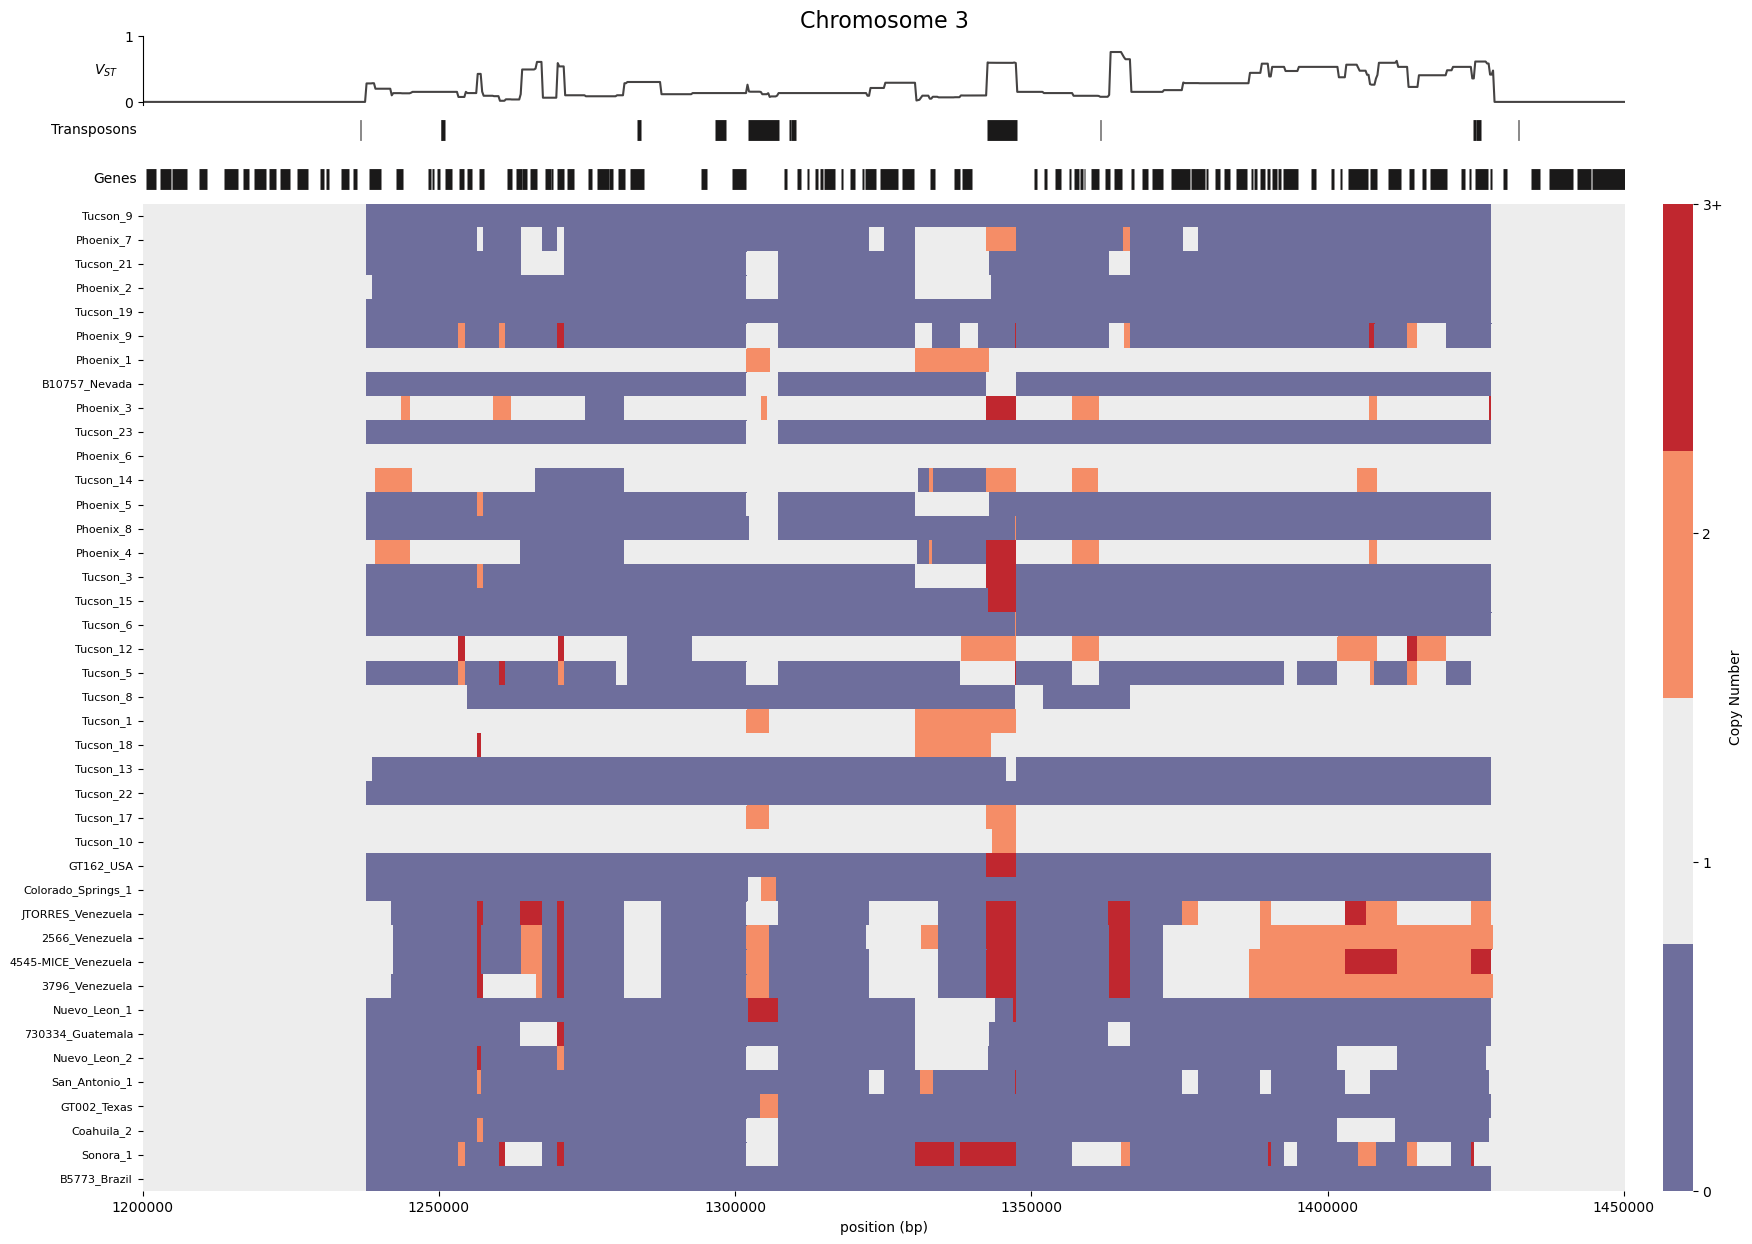

In [11]:
line_cmap = ['#454343', '#1a1919', '#1a1919',]
cmap = [ '#6e6e9c', '#ededed', '#f58d67', '#C0272F']


fig, ax  = plt.subplots(4, 2, figsize=(20, 15), 
                        gridspec_kw={'width_ratios':[100,2],
                                     'height_ratios': [0.07,0.05,0.05,1]})
fig.subplots_adjust(hspace=0, wspace=0.05)

i = 0
chrom = 'CP075070.1'
xmin = 1200000
xmax = 1450050
chrom_num=3

col = 0

#VST plot    
i = 0
temp = df[df['Chromosome'] == chrom]
ax[i,col].plot(temp['Start'], temp['VST_AZ_TXMXSA_CB'],color=line_cmap[0])
ax[i,col].set_xlim(xmin, xmax)
ax[i,col].spines['right'].set_visible(False)
ax[i,col].spines['top'].set_visible(False)
ax[i,col].spines['bottom'].set_visible(False)
ax[i,col].set_xticks([])
ax[i,col].set_title('Chromosome {}'.format(chrom_num),fontsize = 16)
ax[i,col].set_yticks([0,1])
ax[i,col].set_ylabel('$V_{ST}$',rotation=0, va="center", ha="right")

#transposon locations 
i+=1
temp = transposons[transposons['chrom'] == chrom]
for row in temp.iterrows():
    ax[i,col].hlines(0, int(row[1]['start']), int(row[1]['stop']), linewidth=15, color=line_cmap[1])

ax[i,col].set_xlim(xmin, xmax)
ax[i,col].set_frame_on(False)
ax[i,col].set_xticks([])
ax[i,col].set_yticks([])
ax[i,col].set_ylabel('Transposons',rotation=0, va="center", ha="right")

#gene locations
i+=1
temp = gff[gff['chrom'] == chrom]        
for row in temp.iterrows():
    ax[i,col].hlines(0, int(row[1]['start']), int(row[1]['stop']), linewidth=15, color=line_cmap[2])

ax[i,col].set_xlim(xmin, xmax)
ax[i,col].set_frame_on(False)
ax[i,col].set_xticks([])
ax[i,col].set_yticks([])
ax[i,col].set_ylabel('Genes',rotation=0, va="center", ha="right")

#CNVs
i+=1
chr_df = df[df['Chromosome']==chrom].drop_duplicates('Start').set_index('Start')[sorted_strain_cols]
chr_df.where(chr_df<3, 3, inplace=True)
chr_df = chr_df[chr_df.index.isin(range(xmin, xmax))]
for pos in range(chr_df.index.min(), chr_df.index.max(), 250):
    if pos not in chr_df.index:
        chr_df.loc[pos] = np.nan

chr_df = chr_df.sort_index().transpose()
xticklabels = range(xmin, xmax, 50000)
xticks = [chr_df.columns.get_loc(x+1) for x in xticklabels]
sns.heatmap(ax=ax[i,0], data=chr_df, mask=chr_df.isnull(), cbar_kws={'label':'Copy Number'},cbar_ax=ax[i,1],
            cmap=cmap,)
ax[i,0].set_facecolor('white')

#colorbar
cbar = ax[i,0].collections[0].colorbar
cbar.set_ticks([0,1,2,3])
cbar.set_ticklabels(['0','1','2','3+'])


ax[i,col].set_xticks(xticks)
ax[i,col].set_xticklabels(xticklabels, rotation=0)
ax[i,col].set_xlabel('position (bp)')

#set strain labels
ax[i,col].set_yticks(np.arange(0,(len(sorted_strain_cols)))+.5)
ax[i,col].set_yticklabels([s for s in sorted_strain_cols], fontsize=8, va="center")


#hide rows above colorbar
for row in range(3):
    ax[row,1].axis('off')

plt.show()

In [12]:
temp = transposons[transposons['chrom'] == chrom]
temp[(temp['start'].isin(range(xmin, xmax)))]

,chrom,type,start,stop,direction,annotation
6968,CP075070.1,similarity,1235400,1235479,-,"Target ""Motif:RLX-incomp_Blc17_Cpos_C735-L-B11..."
6970,CP075070.1,similarity,1236731,1236810,+,"Target ""Motif:DTX-incomp-chim_Blc63_Superconti..."
6971,CP075070.1,similarity,1250368,1250431,-,"Target ""Motif:DTX-comp_Blc4_Supercontig_3.3_29..."
6972,CP075070.1,similarity,1250381,1251035,+,"Target ""Motif:DTX-incomp_Blc4_Supercontig_3.3_..."
6974,CP075070.1,similarity,1258996,1259024,-,"Target ""Motif:DTX-incomp_Blc66_Supercontig_3.3..."
6978,CP075070.1,similarity,1283295,1284105,-,"Target ""Motif:DTX-incomp_Blc66_Supercontig_3.3..."
6980,CP075070.1,similarity,1296452,1298329,-,"Target ""Motif:RLX-incomp_Blc203_Supercontig_3...."
6981,CP075070.1,similarity,1302024,1307326,-,"Target ""Motif:RLX-comp_Blc3_Supercontig_3.1_36..."
6982,CP075070.1,similarity,1309073,1309378,-,"Target ""Motif:RLX-comp_Blc3_Supercontig_3.1_36..."
6983,CP075070.1,similarity,1309372,1310163,-,"Target ""Motif:RLX-comp_Blc3_Supercontig_3.1_36..."


### Split up populations

In [13]:
pop_counts = Counter(pop_dict.values())

for pop,count in pop_counts.items():
    print('{}: {}'.format(pop, count/len(pop_dict)))

AZ: 0.7073170731707317
TXMXSA: 0.1951219512195122
CB: 0.0975609756097561


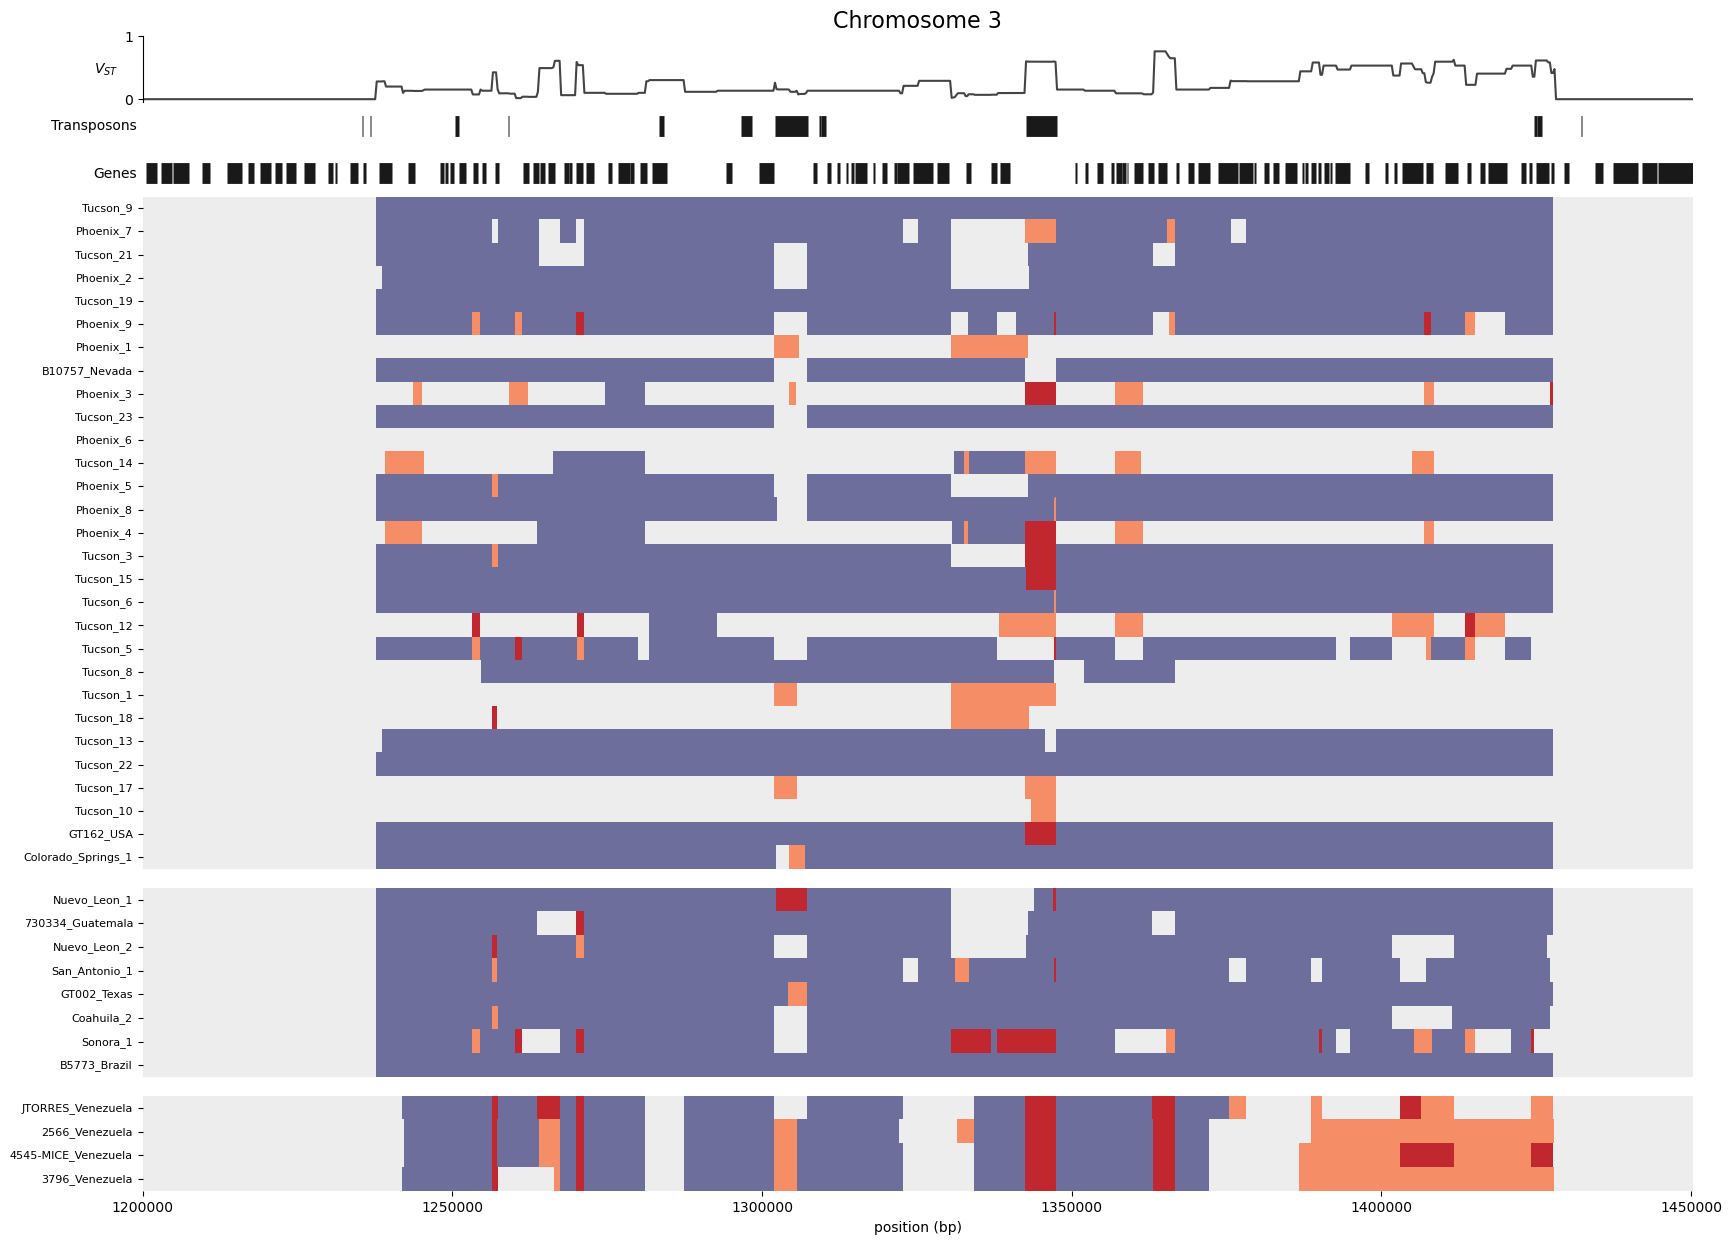

In [14]:
line_cmap = ['#454343', '#1a1919', '#1a1919',]
cmap = [ '#6e6e9c', '#ededed', '#f58d67', '#C0272F']


fig, ax  = plt.subplots(8, 1, figsize=(20, 15), 
                        gridspec_kw={'width_ratios':[100],
                                     'height_ratios': [0.07,0.05,0.05,.71,.02,.2,.02,0.1]})
fig.subplots_adjust(hspace=0, wspace=0.05)

i = 0
chrom = 'CP075070.1'
xmin = 1200000
xmax = 1450050
chrom_num=3

col = 0

#VST plot    
i = 0
temp = df[df['Chromosome'] == chrom]
ax[i].plot(temp['Start'], temp['VST_AZ_TXMXSA_CB'],color=line_cmap[0])
ax[i].set_xlim(xmin, xmax)
ax[i].spines['right'].set_visible(False)
ax[i].spines['top'].set_visible(False)
ax[i].spines['bottom'].set_visible(False)
ax[i].set_xticks([])
ax[i].set_title('Chromosome {}'.format(chrom_num),fontsize = 16)
ax[i].set_yticks([0,1])
ax[i].set_ylabel('$V_{ST}$',rotation=0, va="center", ha="right")

#transposon locations 
i+=1
temp = transposons[transposons['chrom'] == chrom]
for row in temp.iterrows():
    ax[i].hlines(0, int(row[1]['start']), int(row[1]['stop']), linewidth=15, color=line_cmap[1])

ax[i].set_xlim(xmin, xmax)
ax[i].set_frame_on(False)
ax[i].set_xticks([])
ax[i].set_yticks([])
ax[i].set_ylabel('Transposons',rotation=0, va="center", ha="right")

#gene locations
i+=1
temp = gff[gff['chrom'] == chrom]        
for row in temp.iterrows():
    ax[i].hlines(0, int(row[1]['start']), int(row[1]['stop']), linewidth=15, color=line_cmap[1])

ax[i].set_xlim(xmin, xmax)
ax[i].set_frame_on(False)
ax[i].set_xticks([])
ax[i].set_yticks([])
ax[i].set_ylabel('Genes',rotation=0, va="center", ha="right")

#CNVs
for pop in pop_counts.keys():

    i+=1
    pop_strains = [strain for strain in sorted_strain_cols if pop_dict[strain]==pop]
    
    chr_df = df[df['Chromosome']==chrom].drop_duplicates('Start').set_index('Start')[pop_strains]
    chr_df.where(chr_df<3, 3, inplace=True)
    chr_df = chr_df[chr_df.index.isin(range(xmin, xmax))]
    for pos in range(chr_df.index.min(), chr_df.index.max(), 250):
        if pos not in chr_df.index:
            chr_df.loc[pos] = np.nan

    chr_df = chr_df.sort_index().transpose()
    xticklabels = range(xmin, xmax, 50000)
    xticks = [chr_df.columns.get_loc(x+1) for x in xticklabels]
    sns.heatmap(ax=ax[i], data=chr_df, mask=chr_df.isnull(),cmap=cmap,cbar=False)
    ax[i].set_facecolor('white')
    #set strain labels
    ax[i].set_yticks(np.arange(0,(len(pop_strains)))+.5)
    ax[i].set_yticklabels([s for s in pop_strains], fontsize=8, va="center",)
    
    
    if i == 7:
        ax[i].set_xticks(xticks)
        ax[i].set_xticklabels(xticklabels, rotation=0)
        ax[i].set_xlabel('position (bp)')
        
    else:
        ax[i].set_xticks([])
        ax[i].set_xlabel('')
        
        #empty axes for spacing
        i+=1
        ax[i].set_frame_on(False)
        ax[i].set_xticks([])
        ax[i].set_yticks([])

plt.show()

### Clustering by CNV haplotypes

/Users/clairedubin/opt/anaconda3/envs/py3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


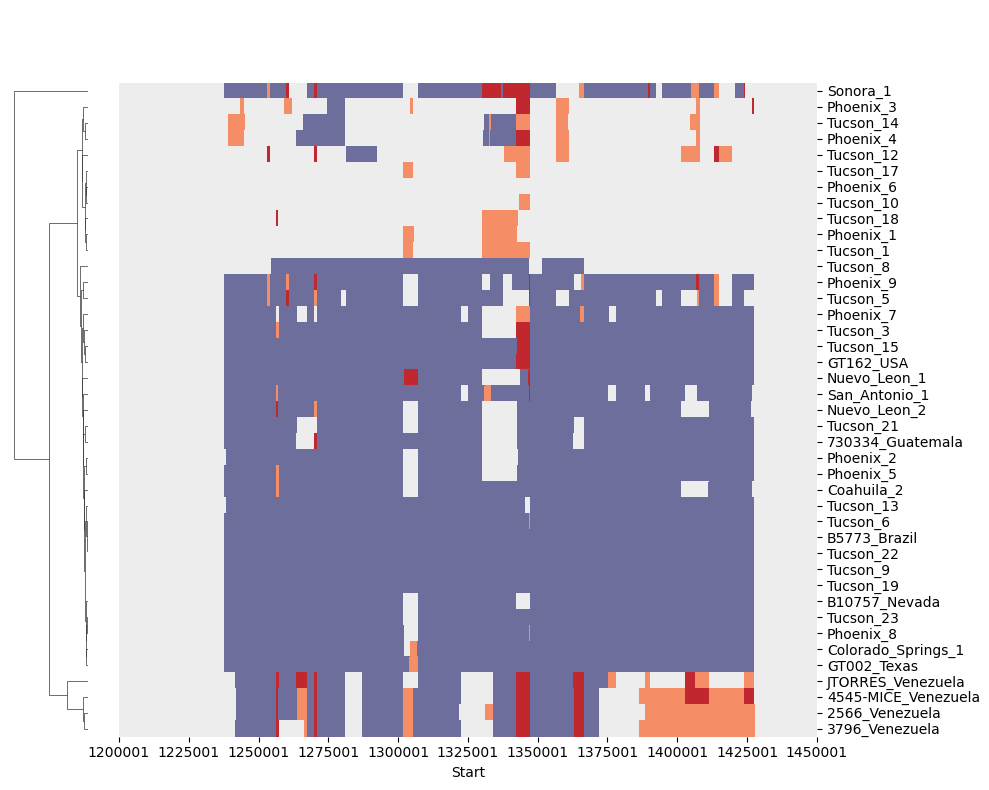

In [15]:
chr_df = df[df['Chromosome']==chrom].drop_duplicates('Start').set_index('Start')[sorted_strain_cols]
chr_df = chr_df[chr_df.index.isin(range(xmin, xmax))]
for pos in range(chr_df.index.min(), chr_df.index.max(), 250):
    if pos not in chr_df.index:
        chr_df.loc[pos] = np.nan

chr_df = chr_df.sort_index().transpose()

sns.clustermap(data=chr_df, mask=chr_df.isnull(), col_cluster=False,
            cmap=cmap,vmin=0, vmax=3, cbar_pos=None, metric='euclidean', method='average', yticklabels=True, xticklabels=100,
              figsize=(10, 8),dendrogram_ratio=0.1)

plt.show()

### Clustering by CNV haplotype, droppping windows that overlap transposons


In [16]:
chr3_transposons = repeatmasker[repeatmasker['chrom'] == chrom]
chr3_transposons = chr3_transposons[chr3_transposons['start'].isin(range(xmin,xmax))]
chr3_transposons_intervals = pd.IntervalIndex.from_arrays(chr3_transposons['start'],chr3_transposons['stop'])
chr3_transposons_intervals

IntervalIndex([(1200208, 1200279], (1201931, 1201970], (1202029, 1202081], (1202761, 1202805], (1202870, 1202899] ... (1436230, 1436257], (1436789, 1436823], (1437475, 1437520], (1439075, 1439121], (1440680, 1440706]],
              closed='right',
              dtype='interval[int64]')

In [17]:
def no_tx_overlap(window_start, window_size=250):
    ##return True if no transposons overlap the window, False if a transposon overlaps the window
        
    overlap_count = sum(chr3_transposons_intervals.overlaps(pd.Interval(window_start, window_start+window_size)))
    
    if overlap_count > 0:
        return False
    else:
        return True

/Users/clairedubin/opt/anaconda3/envs/py3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


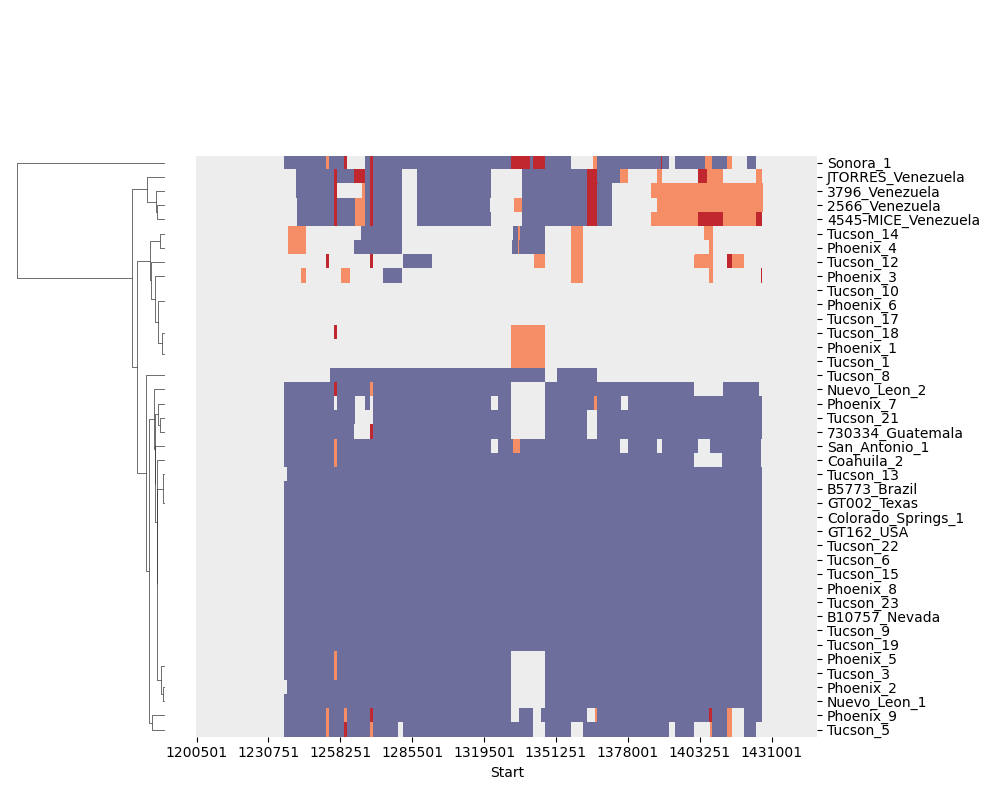

In [18]:
chr_df = df[df['Chromosome']==chrom].drop_duplicates('Start').set_index('Start')[sorted_strain_cols]
# chr_df.where(chr_df<3, 3, inplace=True)
chr_df = chr_df[chr_df.index.isin(range(xmin, xmax))]
for pos in range(chr_df.index.min(), chr_df.index.max(), 250):
    if pos not in chr_df.index:
        chr_df.loc[pos] = np.nan
chr_df = chr_df.loc[chr_df.index.map(no_tx_overlap)]

chr_df = chr_df.sort_index().transpose()

sns.clustermap(data=chr_df, mask=chr_df.isnull(), col_cluster=False,
            cmap=cmap,vmin=0, vmax=3, cbar_pos=None, metric='euclidean', method='average', yticklabels=True, xticklabels=100,
              figsize=(10, 8),dendrogram_ratio=0.2)

plt.show()

### Clustering by CNV haplotype, droppping windows that overlap transposons, adding genes and VST to plot

Adding other plots to clustermap code from: https://stackoverflow.com/questions/51811972/adding-seaborn-clustermap-to-figure-with-other-plots

/Users/clairedubin/opt/anaconda3/envs/py3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


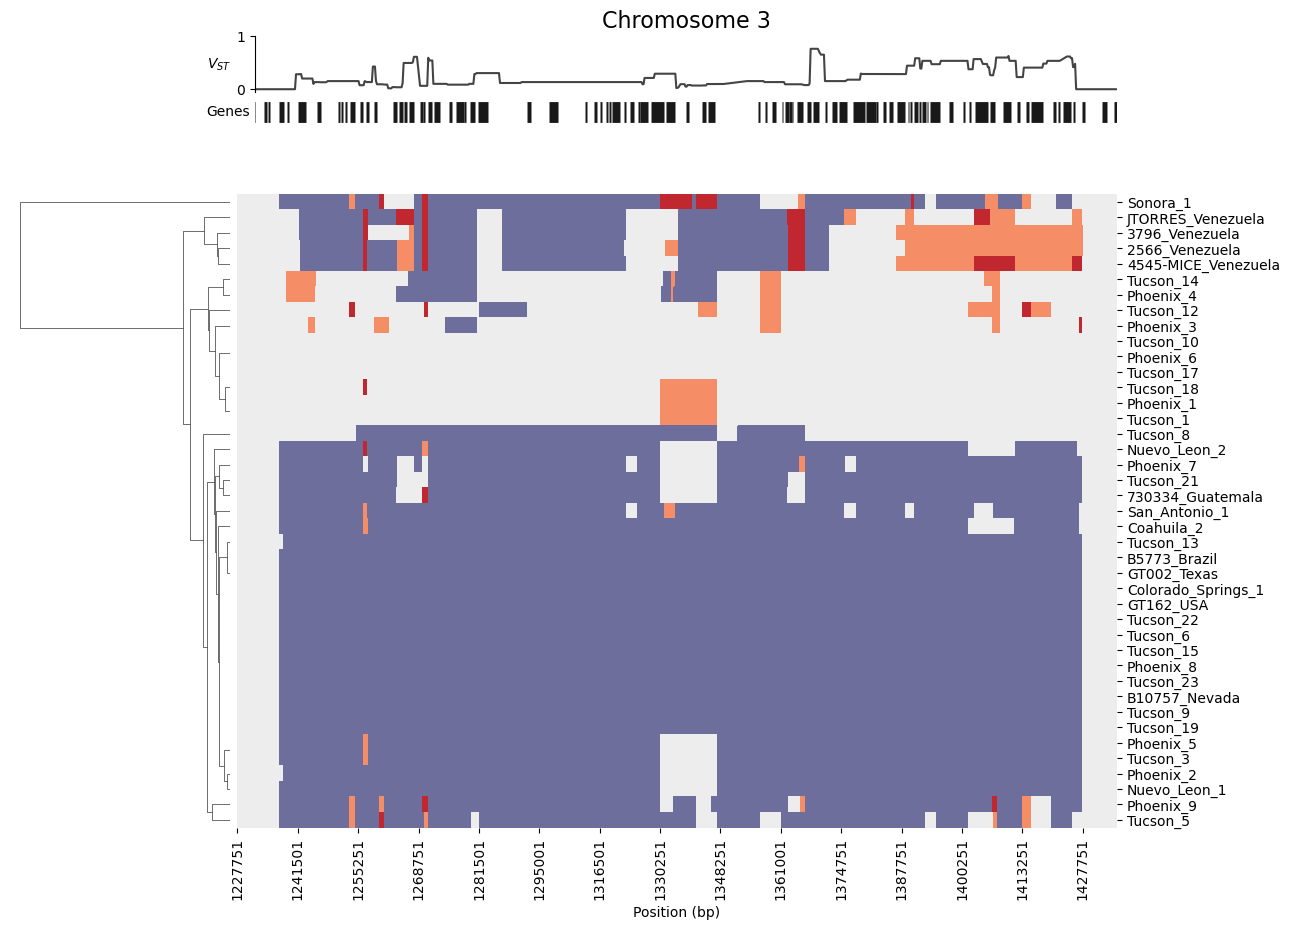

In [21]:
chrom = 'CP075070.1'
xmin = start-10000
xmax = stop+10000
chrom_num=3


chr_df = df[df['Chromosome']==chrom].drop_duplicates('Start').set_index('Start')[sorted_strain_cols]
# chr_df.where(chr_df<3, 3, inplace=True)
chr_df = chr_df[chr_df.index.isin(range(xmin, xmax))]
for pos in range(chr_df.index.min(), chr_df.index.max(), 250):
    if pos not in chr_df.index:
        chr_df.loc[pos] = np.nan
chr_df = chr_df.loc[chr_df.index.map(no_tx_overlap)]
chr_df = chr_df.sort_index().transpose()

f = sns.clustermap(data=chr_df, mask=chr_df.isnull(), col_cluster=False,
            cmap=cmap,vmin=0, vmax=3, cbar_pos=None, metric='euclidean', method='average', 
                   yticklabels=True, xticklabels=50,
              figsize=(13, 8),dendrogram_ratio=0.2)

f.gs.update(top=1, bottom=0.01)
ax = f.ax_heatmap
ax.set_xlabel("Position (bp)")



# plot VST
gs2 = matplotlib.gridspec.GridSpec(1,1, top=1, bottom=.93, left=.2)
ax2 = f.fig.add_subplot(gs2[0])
temp = df[df['Chromosome'] == chrom].set_index('Start')
temp = temp.loc[temp.index.map(no_tx_overlap)]


ax2.plot(temp.index, temp['VST_AZ_TXMXSA_CB'],color=line_cmap[0])
ax2.set_xlim(xmin, xmax)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.set_title('Chromosome {}'.format(chrom_num),fontsize = 16)
ax2.set_yticks([0,1])
ax2.set_ylabel('$V_{ST}$',rotation=0, va="center", ha="right")


# plot genes
gs3 = matplotlib.gridspec.GridSpec(1,1, top=.93, bottom=.88, left=.2)
ax3 = f.fig.add_subplot(gs3[0])
temp = gff[gff['chrom'] == chrom]        
for row in temp.iterrows():
    
    if int(row[1]['start']) > xmax or int(row[1]['stop']) < xmin:
        continue
    
    ax3.hlines(0, int(row[1]['start']), int(row[1]['stop']), linewidth=15, color=line_cmap[1])
    ax3.set_xlim(xmin, xmax)
    ax3.set_frame_on(False)
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_ylabel('Genes',rotation=0, va="center", ha="right")
    


plt.show()

### Figure 4: Clustering by CNV haplotype, droppping windows that overlap transposons, adding genes and VST to plot, and coloring by population

Adding other plots to clustermap code from: https://stackoverflow.com/questions/51811972/adding-seaborn-clustermap-to-figure-with-other-plots

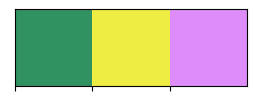

In [22]:
#AZ, CB, TXMXSA
pop_cmap = ['#309161','#eded42',  '#dd8cfa',]
sns.palplot(pop_cmap)
plt.show()

/Users/clairedubin/opt/anaconda3/envs/py3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


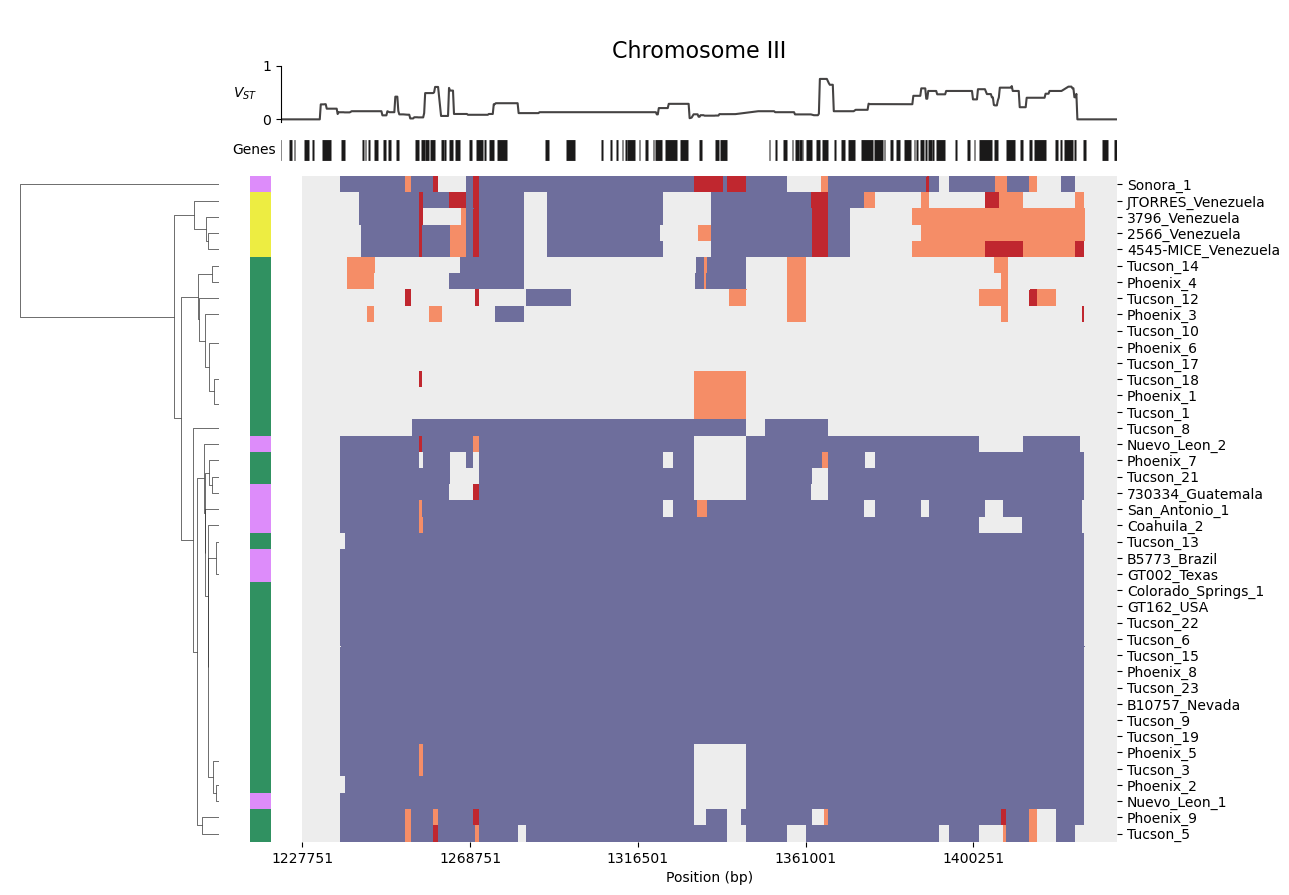

In [25]:
chrom = 'CP075070.1'
xmin = start-10000
xmax = stop+10000
chrom_num=3

pops = chr_df.index.map(pop_dict)
pop_color_map = dict(zip(pops.unique(), pop_cmap))
pop_colors = pops.map(pop_color_map)

chr_df = df[df['Chromosome']==chrom].drop_duplicates('Start').set_index('Start')[sorted_strain_cols]
# chr_df.where(chr_df<3, 3, inplace=True)
chr_df = chr_df[chr_df.index.isin(range(xmin, xmax))]
for pos in range(chr_df.index.min(), chr_df.index.max(), 250):
    if pos not in chr_df.index:
        chr_df.loc[pos] = np.nan
chr_df = chr_df.loc[chr_df.index.map(no_tx_overlap)]



chr_df = chr_df.sort_index().transpose()

f = sns.clustermap(data=chr_df, mask=chr_df.isnull(), col_cluster=False,
            cmap=cmap,vmin=0, vmax=3, cbar_pos=None, metric='euclidean', method='average', 
                   yticklabels=True, xticklabels=150, 
                   row_colors=pop_colors, colors_ratio = 0.02,
              figsize=(13, 8),dendrogram_ratio=0.2)

f.ax_heatmap.set_xticklabels(f.ax_heatmap.get_xticklabels(), rotation=0)
f.gs.update(top=1.05, bottom=0.01)
ax = f.ax_heatmap
ax.set_xlabel("Position (bp)")


# plot VST
gs2 = matplotlib.gridspec.GridSpec(1,1, top=.98, bottom=.91, left=.22)
ax2 = f.fig.add_subplot(gs2[0])
temp = df[df['Chromosome'] == chrom].set_index('Start')
temp = temp.loc[temp.index.map(no_tx_overlap)]

ax2.plot(temp.index, temp['VST_AZ_TXMXSA_CB'],color=line_cmap[0])
ax2.set_xlim(xmin, xmax)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.set_title('Chromosome III',fontsize = 16)
ax2.set_yticks([0,1])
ax2.set_ylabel('$V_{ST}$',rotation=0, va="center", ha="right")


# plot genes
gs3 = matplotlib.gridspec.GridSpec(1,1, top=.90, bottom=.85, left=.22)
ax3 = f.fig.add_subplot(gs3[0])
temp = gff[gff['chrom'] == chrom]        
for row in temp.iterrows():
    
    if int(row[1]['start']) > xmax or int(row[1]['stop']) < xmin:
        continue
    
    ax3.hlines(0, int(row[1]['start']), int(row[1]['stop']), linewidth=15, color=line_cmap[1])
    ax3.set_xlim(xmin, xmax)
    ax3.set_frame_on(False)
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_ylabel('Genes',rotation=0, va="center", ha="right")
    
plt.savefig('../figures/fig4_chr3_CNV.png', dpi=300, facecolor='white', bbox_inches='tight', pad_inches=2, format='png')

plt.show()

### As above but transposons included for figure S4:

/Users/clairedubin/opt/anaconda3/envs/py3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


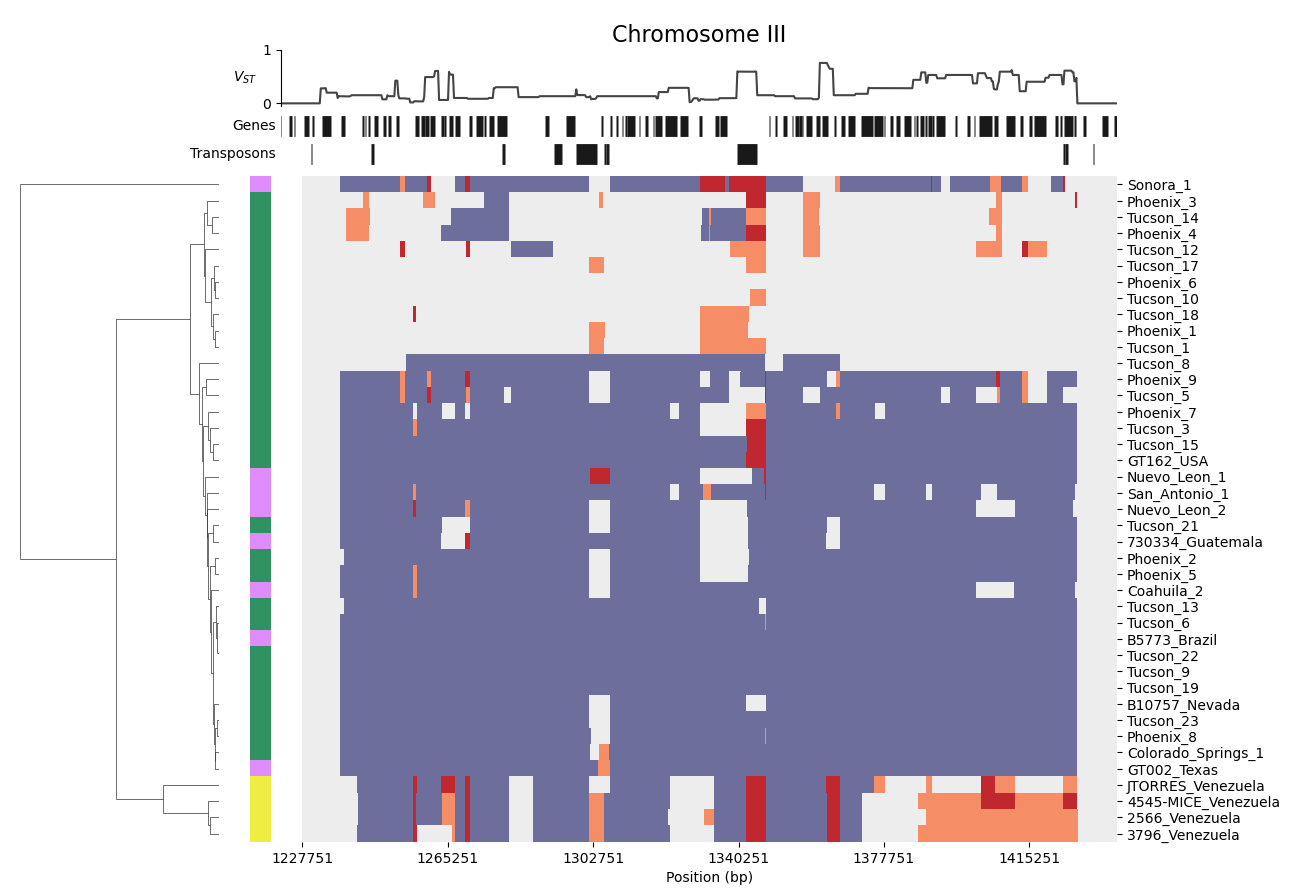

In [26]:
chrom = 'CP075070.1'
xmin = start-10000
xmax = stop+10000
chrom_num=3

pops = chr_df.index.map(pop_dict)
pop_color_map = dict(zip(pops.unique(), pop_cmap))
pop_colors = pops.map(pop_color_map)

chr_df = df[df['Chromosome']==chrom].drop_duplicates('Start').set_index('Start')[sorted_strain_cols]
# chr_df.where(chr_df<3, 3, inplace=True)
chr_df = chr_df[chr_df.index.isin(range(xmin, xmax))]
for pos in range(chr_df.index.min(), chr_df.index.max(), 250):
    if pos not in chr_df.index:
        chr_df.loc[pos] = np.nan
# chr_df = chr_df.loc[chr_df.index.map(no_tx_overlap)]



chr_df = chr_df.sort_index().transpose()

f = sns.clustermap(data=chr_df, mask=chr_df.isnull(), col_cluster=False,
            cmap=cmap,vmin=0, vmax=3, cbar_pos=None, metric='euclidean', method='average', 
                   yticklabels=True, xticklabels=150, 
                   row_colors=pop_colors, colors_ratio = 0.02,
              figsize=(13, 8),dendrogram_ratio=0.2)

f.ax_heatmap.set_xticklabels(f.ax_heatmap.get_xticklabels(), rotation=0)
f.gs.update(top=1.05, bottom=0.01)
ax = f.ax_heatmap
ax.set_xlabel("Position (bp)")

# plot VST
gs2 = matplotlib.gridspec.GridSpec(1,1, top=1, bottom=.93, left=.22)
ax2 = f.fig.add_subplot(gs2[0])
temp = df[df['Chromosome'] == chrom].set_index('Start')
# temp = temp.loc[temp.index.map(no_tx_overlap)]

ax2.plot(temp.index, temp['VST_AZ_TXMXSA_CB'],color=line_cmap[0])
ax2.set_xlim(xmin, xmax)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.set_title('Chromosome III',fontsize = 16)
ax2.set_yticks([0,1])
ax2.set_ylabel('$V_{ST}$',rotation=0, va="center", ha="right")


# plot genes
gs3 = matplotlib.gridspec.GridSpec(1,1, top=.93, bottom=.88, left=.22)
ax3 = f.fig.add_subplot(gs3[0])
temp = gff[gff['chrom'] == chrom]        
for row in temp.iterrows():
    
    if int(row[1]['start']) > xmax or int(row[1]['stop']) < xmin:
        continue
    
    ax3.hlines(0, int(row[1]['start']), int(row[1]['stop']), linewidth=15, color=line_cmap[1])
    ax3.set_xlim(xmin, xmax)
    ax3.set_frame_on(False)
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.set_ylabel('Genes',rotation=0, va="center", ha="right")
    
    
#plot transposon locations 
gs4 = matplotlib.gridspec.GridSpec(1,1, top=.89, bottom=.85, left=.22)
ax4 = f.fig.add_subplot(gs4[0])
temp = transposons[transposons['chrom'] == chrom]

for row in temp.iterrows():
    
    if int(row[1]['start']) > xmax or int(row[1]['stop']) < xmin:
        continue
        
    ax4.hlines(0, int(row[1]['start']), int(row[1]['stop']), linewidth=15, color=line_cmap[1])

    ax4.set_xlim(xmin,xmax)
    ax4.set_frame_on(False)
    ax4.set_xticks([])
    ax4.set_yticks([])
    ax4.set_ylabel('Transposons',rotation=0, va="center", ha="right", )
    
plt.savefig('../figures/figS4_chr3_CNV_region_with_transposons.png', dpi=300, facecolor='white', bbox_inches='tight', pad_inches=2, format='png')

plt.show()